# Calculating Portfolio Returns with Pandas DataFrames

## 1. Import Libraries and Dependencies

In [1]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

## 2. Set the File Path to the CSVs using the Pathlib Library

In [2]:
# Set the file paths for the CSVs using the Path class from the pathlib library
msft_csv_path = Path("../Resources/MSFT.csv")
sp500_csv_path = Path("../Resources/SP500.csv")

## 3. Import the CSVs as Pandas DataFrames

In [3]:
# Read the daily closing prices of MSFT, set the `date` as a datetime index
msft_df = pd.read_csv(msft_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df = pd.read_csv(sp500_csv_path, index_col="date", parse_dates=True, infer_datetime_format=True)

## 4. Combine the DataFrames and Sort the Index

In [4]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([msft_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Display a few rows
combined_df.head()

,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.68,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.80,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.29,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.37,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.26,40.26,39.8100,1911.910034


## 5. Drop the Extraneous Columns

In [5]:
# Drop extra columns and only leave the close columns and associated values
combined_df.drop(columns=['volume', 'open', 'high', 'low'], inplace=True)
combined_df.head()

,close,close
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 6. Rename Columns

In [6]:
# Rename the columns to match the corresponding stock
combined_df.columns = ['MSFT', 'SP500']
combined_df.head()

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 7. Calculate Daily Returns

In [7]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,MSFT,SP500
date,,
2014-05-20,NaN,NaN
2014-05-21,0.016885,0.008116
2014-05-22,-0.006196,0.002362
2014-05-23,0.000499,0.004248
2014-05-27,0.001745,0.005988


## 8. Calculate Daily Portfolio Returns

In [8]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.6, 0.4]

portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

date
2014-05-20         NaN
2014-05-21    0.013377
2014-05-22   -0.002773
2014-05-23    0.001999
2014-05-27    0.003442
dtype: float64

## 9. Plot Daily Portfolio Returns

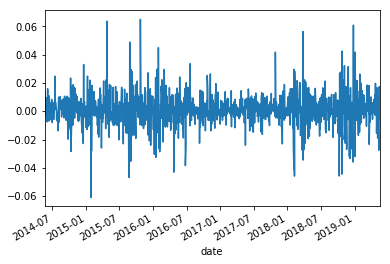

In [9]:
# Use the `plot` function to plot the daily portfolio returns
portfolio_returns.plot()

## 10. Calculate Cumulative Portfolio Returns

In [10]:
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.head()

date
2014-05-20         NaN
2014-05-21    0.013377
2014-05-22    0.010568
2014-05-23    0.012588
2014-05-27    0.016073
dtype: float64

## 11. Plot Cumulative Portfolio Returns

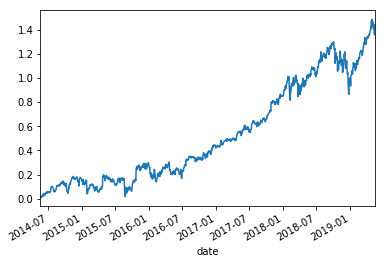

In [11]:
# Use the `plot` function to plot the cumulative portfolio returns
cumulative_returns.plot()